**Тестовое задание**<br><br>
Руководство компании обратило внимание на то, что сотрудники старше 35 
лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин 
количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. 
В связи с этой ситуацией, руководство организации планирует ввести 
дополнительные медицинские осмотры среди групп риска.<br> 
Вам необходимо проверить следующие гипотезы:
1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по 
болезни значимо чаще женщин.
2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих 
дней (work_days) по болезни значимо чаще своих более молодых коллег.

Все необходимые данные содержатся в файле «М.Тех_Данные_к_ТЗ_DS».<br>
Решение необходимо предоставить:
1) В виде jupyter notebook (с аккуратно оформленным кодом, графиками и 
описанной логикой решения).
2) В виде дашборда на Streamlit с простым функционалом: 
a. должна быть возможность загрузить .csv, в формате аналогично 
файлу «Статистика»
b. должна быть возможность задать параметры age и work_days
c. указан результат проверки гипотез
d. указана логика получения результата (должны быть отрисованы 
графики распределений, указаны критерии проверки (стат. тесты, 
статистики, уровень значимости т.п.)<br><br>

Код проекта должен быть обернут в docker выложен в Gitlab/Github репозиторий
предоставлена ссылка на него, сохраненная в файл формата .doc, .docx, .pdf, tss. Файл 
назови по следующему принципу: Фамилия_Имя_Название_вакансии. Будет 
обращаться внимание на качество кода, код стайл, оформление ноутбука, кода и 
репозитория. Будет плюсом, если дашборд будет поднят на сервере и на него будет 
предоставлена ссылка.

## 1. Изучение данных, предобрабока

Загрузим необходимые библиотеки, данные, проверим наличие пропусков, аномалий, корректность типов данных, распределения.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

In [39]:
data = pd.read_csv('C:/openData/Mtech/2/_DS.csv', sep=',',encoding='mbcs', quoting=3, doublequote=True)
df.head()

,"""Количество больничных дней","""""Возраст""""","""""Пол"""""""
0,"""5",39,"""""Ж"""""""
1,"""4",54,"""""М"""""""
2,"""4",26,"""""М"""""""
3,"""5",42,"""""М"""""""
4,"""4",29,"""""М"""""""


In [40]:
#при открытии файла сразу неудалось избавиться от кавычек, уберем их принудительно в данных и в заголовках

data = data.replace({'"': ''}, regex=True)
data.head()

,"""Количество больничных дней","""""Возраст""""","""""Пол"""""""
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   "Количество больничных дней  237 non-null    object
 1   ""Возраст""                  237 non-null    int64 
 2   ""Пол"""                     237 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.7+ KB


In [42]:
data.rename(columns={'"Количество больничных дней': 'Количество больничных дней', '""Возраст""': 'Возраст', '""Пол"""': 'Пол'}, inplace=True)

В колонке Количество больничных дней изменим тип данных на int

In [43]:
data['Количество больничных дней'] = data['Количество больничных дней'].astype(int)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int32 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int32(1), int64(1), object(1)
memory usage: 4.8+ KB


## 2. Исследовательский анализ

Посмотрим распределение

In [45]:
data.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


In [46]:
data['Пол'].value_counts()

Пол
М    139
Ж     98
Name: count, dtype: int64

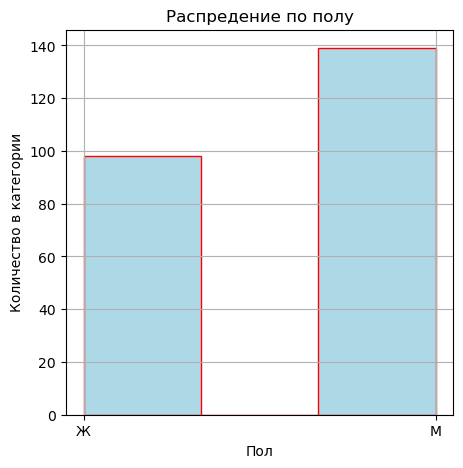

In [47]:
plt.figure(figsize=(5,5))
plt.title('Распредение по полу')
plt.hist(data['Пол'],bins=3, color='lightblue', ec='red')
plt.grid (True)
plt.ylabel('Количество в категории')
plt.xlabel('Пол')

plt.show()

In [48]:
period_sick = data.groupby(['Пол', 'Количество больничных дней']).agg(count=('Возраст', 'count'))
print(period_sick)

                                count
Пол Количество больничных дней       
Ж   0                               1
    1                              14
    2                              16
    3                              23
    4                              23
    5                               8
    6                               9
    7                               3
    8                               1
М   0                               8
    1                              16
    2                              31
    3                              31
    4                              25
    5                              12
    6                               5
    7                               7
    8                               4


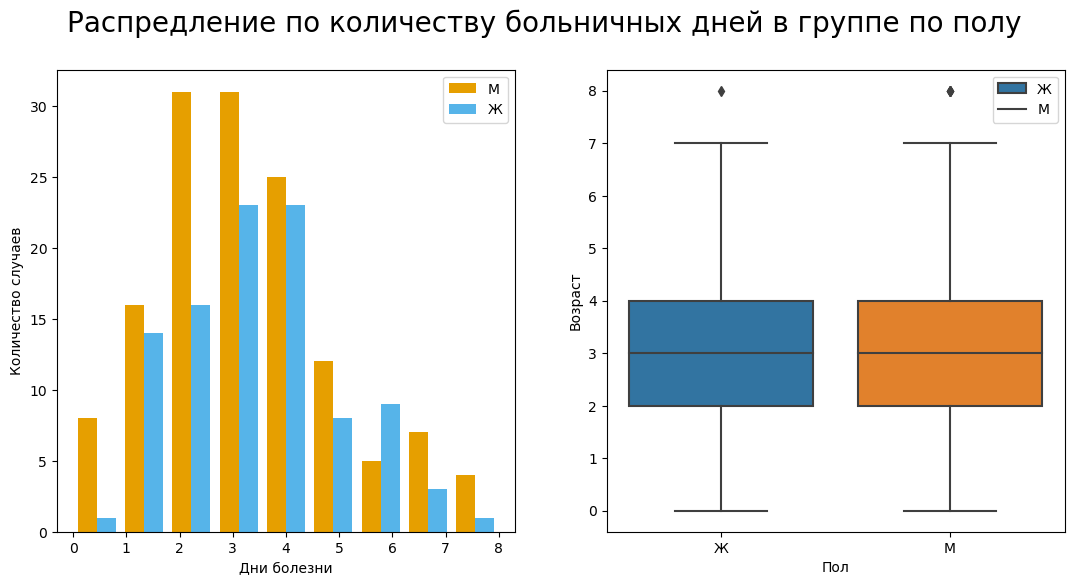

In [49]:
fig = plt.figure(figsize = (13,6))
fig.suptitle('Распредление по количеству больничных дней в группе по полу', fontsize=20)


plt.subplot(1, 2, 1)
x1 = list(data[data['Пол'] == 'М']['Количество больничных дней'])
x2 = list(data[data['Пол'] == 'Ж']['Количество больничных дней'])

colors = ['#E69F00', '#56B4E9']

plt.hist([x1, x2], bins = 9, color = colors)


plt.legend(['М', 'Ж'])
plt.xlabel('Дни болезни')
plt.ylabel('Количество случаев')


plt.subplot(1, 2, 2)
sns.boxplot(data = data, y = 'Количество больничных дней', x = 'Пол')
plt.legend(['Ж', 'М'])
plt.xlabel('Пол')
plt.ylabel('Возраст')


plt.show()

Мужчин больше чем женщин.

Видим среднее количество больничных дней и медиана несильно отличаются, значит рапределение нормальное.

Минимальный возраст 23 года, максимальных 60 лет.

Может показаться, что мужчины болеют дольше и чаще чем женщины, однако общее распределние показывает, срок болезни по полу одинаковый. Проверим это позже на модели. Чаще всего люди болеют от 2 до 4х дней. Срок болезни 7 дней и более уже относится к максимальному и такие случаи единичны. 

**Рассмотрим количество людей по возрасту**

In [50]:
data.groupby('Пол')['Возраст'].value_counts()

Пол  Возраст
Ж    41         10
     45          9
     39          8
     40          8
     36          7
     43          5
     49          5
     50          5
     38          4
     42          3
     30          3
     47          3
     46          3
     34          3
     35          2
     25          2
     31          2
     32          2
     33          2
     37          2
     55          2
     44          2
     23          1
     24          1
     60          1
     54          1
     48          1
     26          1
М    42         14
     41         10
     35          9
     43          9
     36          9
     34          7
     38          7
     48          6
     37          6
     47          5
     39          5
     44          5
     31          4
     27          4
     45          4
     52          4
     46          4
     29          3
     30          3
     40          3
     33          3
     53          2
     32          2
     49          2

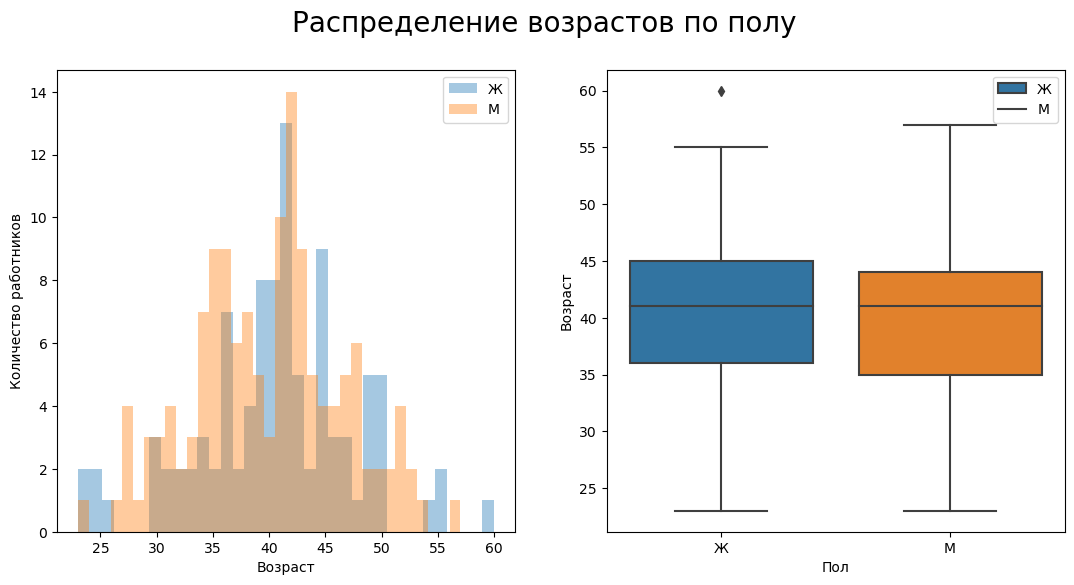

In [51]:
fig = plt.figure(figsize = (13,6))
fig.suptitle('Распределение возрастов по полу', fontsize=20)


plt.subplot(1, 2, 1)
data.groupby('Пол')['Возраст'].plot(kind='hist', bins=35, alpha=0.4)
plt.legend(['Ж', 'М'])
plt.xlabel('Возраст')
plt.ylabel('Количество работников')


plt.subplot(1, 2, 2)
sns.boxplot(data = data, y = 'Возраст', x = 'Пол')
plt.legend(['Ж', 'М'])
plt.xlabel('Пол')
plt.ylabel('Возраст')


plt.show()

Женщины: большая часть находится в возрасте 36-45 лет. Минимальный возраст 23 года, максимальный 60 лет, по одному человеку.

Мужчины: большая часть находится в возрасте 35-44 года. Минимальный возраст 23 года, максимальный 57 лет, по одному человеку.


## 3. Проверка гипотез






1. Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.
2. Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

H_0: Мужчины пропускают в течение года рабочих дней о болезни столько же как и женщины. 
H_a: Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.
alpha = 0.05

In [52]:

results = st.ttest_ind(
    list(data[data['Пол'] == 'М']['Количество больничных дней']),
    list(data[data['Пол'] == 'Ж']['Количество больничных дней']), 
    equal_var=False)
alpha = 0.05 
print(results.pvalue)
print(results)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

0.4239959914355368
TtestResult(statistic=-0.800985603738584, pvalue=0.4239959914355368, df=222.10444348918975)
Не получилось отвергнуть нулевую гипотезу


Первая гипотеза не подтвердилась, подтвердился результат из графиков. Мужчины и женщины пропускают одинаковое количество дней по болезни.

H_0: Работники старше 35 лет (age) пропускают в течение года рабочих дней о болезни столько же как и более молодые коллеги. 
H_a: Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.
alpha = 0.05

In [53]:

results = st.ttest_ind(
    list(data[data['Возраст'] >= 35]['Количество больничных дней']),
    list(data[data['Возраст'] < 35]['Количество больничных дней']), 
    equal_var=False)
alpha = 0.05 
print(results.pvalue)
print(results)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

0.3496119728290893
TtestResult(statistic=-0.9416437678927063, pvalue=0.3496119728290893, df=70.03266410713353)
Не получилось отвергнуть нулевую гипотезу


Вторая гипотеза подтвердилась. Люди от 35 лет и старше пропускают больше дней по болезни в сравнении с людьми до 35 лет.

## 4. Вывод:
Были рассмотрены данные по больничным дням сотрудников.<br> 
- Сотрудников мужчин больше чем женщин.
- Минимальный возраст 23 года, максимальных 60 лет.
- Чаще всего люди болеют от 2 до 4х дней. 7 дней и более максимальный срок болезни, случаи единичны.
- Зависимости срока болезни от гендера нет. Первая гипотеза не подтвердилась
- Наибольшее количество женщин находится в возрасте 36-45 лет, мужчин - 35-44 года.
- Вторая гипотеза подтвердилась. Люди от 35 лет и старше пропускают больше дней по болезни в сравнении с людьми до 35 лет.
